In [368]:
# # For Data reading 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For data visualization
import matplotlib.pyplot as plt

# For model building & scoreing
from sklearn.ensemble import RandomForestRegressor

# others
import warnings
warnings.filterwarnings('ignore')

In [369]:
df = pd.read_csv(r'C:\Users\artiy\Downloads\icu bed occupancy (1).csv')
df.shape

(1260, 9)

In [370]:
df.head()

,HospitalName,Day,Total ICU Bed,Available Bed,Patient admitted,Pateint discharged,Avg. Patient Age,Occupancy,% occupancy
0,1,1,76,50,5,17,41,14,18.421
1,1,2,76,62,10,9,30,15,19.737
2,1,3,76,61,6,8,30,13,17.105
3,1,4,76,63,8,10,51,11,14.474
4,1,5,76,65,13,7,55,17,22.368


In [371]:
df.dtypes

HospitalName            int64
Day                     int64
Total ICU Bed           int64
Available Bed           int64
Patient admitted        int64
Pateint discharged      int64
Avg. Patient Age        int64
Occupancy               int64
% occupancy           float64
dtype: object

# Data Exploration

In [372]:
df.describe()

,HospitalName,Day,Total ICU Bed,Available Bed,Patient admitted,Pateint discharged,Avg. Patient Age,Occupancy,% occupancy
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,3.500000,105.500000,87.666667,43.642063,30.919841,30.780159,44.378571,44.164286,50.236798
std,1.708503,60.645161,8.753077,20.167991,17.998652,14.437235,20.570158,20.710321,22.457510
min,1.000000,1.000000,76.000000,-5.000000,1.000000,1.000000,10.000000,-8.000000,-10.256000
25%,2.000000,53.000000,78.000000,30.000000,18.000000,19.000000,26.000000,28.000000,33.333000
50%,3.500000,105.500000,88.000000,44.000000,29.000000,30.000000,43.000000,43.000000,50.000000
75%,5.000000,158.000000,96.000000,58.000000,39.000000,42.000000,62.000000,57.000000,66.000000
max,6.000000,210.000000,100.000000,98.000000,96.000000,95.000000,80.000000,101.000000,105.208000


In [373]:
df.describe(include='all')

,HospitalName,Day,Total ICU Bed,Available Bed,Patient admitted,Pateint discharged,Avg. Patient Age,Occupancy,% occupancy
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,3.500000,105.500000,87.666667,43.642063,30.919841,30.780159,44.378571,44.164286,50.236798
std,1.708503,60.645161,8.753077,20.167991,17.998652,14.437235,20.570158,20.710321,22.457510
min,1.000000,1.000000,76.000000,-5.000000,1.000000,1.000000,10.000000,-8.000000,-10.256000
25%,2.000000,53.000000,78.000000,30.000000,18.000000,19.000000,26.000000,28.000000,33.333000
50%,3.500000,105.500000,88.000000,44.000000,29.000000,30.000000,43.000000,43.000000,50.000000
75%,5.000000,158.000000,96.000000,58.000000,39.000000,42.000000,62.000000,57.000000,66.000000
max,6.000000,210.000000,100.000000,98.000000,96.000000,95.000000,80.000000,101.000000,105.208000


In [374]:
df.isnull().sum()

HospitalName          0
Day                   0
Total ICU Bed         0
Available Bed         0
Patient admitted      0
Pateint discharged    0
Avg. Patient Age      0
Occupancy             0
% occupancy           0
dtype: int64

In [375]:
df.dtypes

HospitalName            int64
Day                     int64
Total ICU Bed           int64
Available Bed           int64
Patient admitted        int64
Pateint discharged      int64
Avg. Patient Age        int64
Occupancy               int64
% occupancy           float64
dtype: object

In [376]:
temp = pd.DataFrame(index=df.columns)
temp['data_type'] = df.dtypes
temp['null_count'] = df.isnull().sum()
temp['unique_count'] = df.nunique()
temp

,data_type,null_count,unique_count
HospitalName,int64,0,6
Day,int64,0,210
Total ICU Bed,int64,0,6
Available Bed,int64,0,99
Patient admitted,int64,0,83
Pateint discharged,int64,0,76
Avg. Patient Age,int64,0,71
Occupancy,int64,0,102
% occupancy,float64,0,420


Text(0.5, 0, 'Patient admitted')

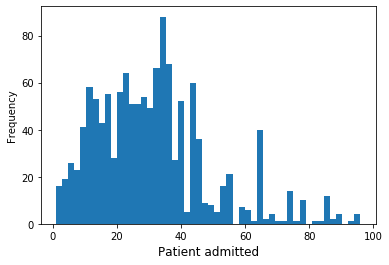

In [377]:
df['Patient admitted'].plot.hist(bins = 50)
plt.xlabel('Patient admitted', fontsize=12)

Text(0.5, 0, 'Pateint discharged')

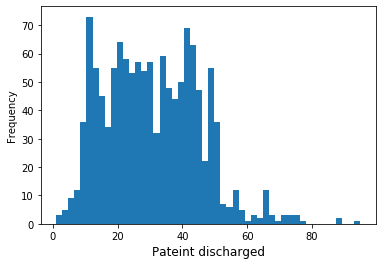

In [378]:
df['Pateint discharged'].plot.hist(bins = 50)
plt.xlabel('Pateint discharged', fontsize=12)

In [379]:
df.drop_duplicates()

,HospitalName,Day,Total ICU Bed,Available Bed,Patient admitted,Pateint discharged,Avg. Patient Age,Occupancy,% occupancy
0,1,1,76,50,5,17,41,14,18.421
1,1,2,76,62,10,9,30,15,19.737
2,1,3,76,61,6,8,30,13,17.105
3,1,4,76,63,8,10,51,11,14.474
4,1,5,76,65,13,7,55,17,22.368
...,...,...,...,...,...,...,...,...,...
1255,6,206,96,51,48,54,35,39,40.625
1256,6,207,96,57,12,19,21,32,33.333
1257,6,208,96,64,45,51,37,26,27.083
1258,6,209,96,70,75,65,29,36,37.500


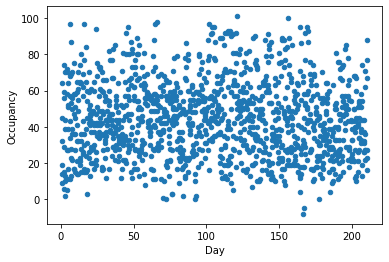

In [380]:
df.plot.scatter('Day','Occupancy')

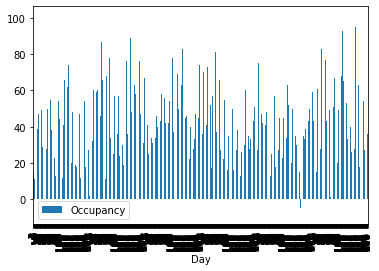

In [381]:
df.plot.bar('Day','Occupancy')

In [382]:
df.corr()['Occupancy']

HospitalName          0.062550
Day                  -0.041170
Total ICU Bed         0.269820
Available Bed        -0.540609
Patient admitted      0.328696
Pateint discharged   -0.105941
Avg. Patient Age      0.021055
Occupancy             1.000000
% occupancy           0.973276
Name: Occupancy, dtype: float64

In [383]:
y=df['Occupancy']
y

0       14
1       15
2       13
3       11
4       17
        ..
1255    39
1256    32
1257    26
1258    36
1259    77
Name: Occupancy, Length: 1260, dtype: int64

In [387]:
x=df.drop(['HospitalName','Day','Occupancy','% occupancy'],axis=1)
x

,Total ICU Bed,Available Bed,Patient admitted,Pateint discharged,Avg. Patient Age
0,76,50,5,17,41
1,76,62,10,9,30
2,76,61,6,8,30
3,76,63,8,10,51
4,76,65,13,7,55
...,...,...,...,...,...
1255,96,51,48,54,35
1256,96,57,12,19,21
1257,96,64,45,51,37
1258,96,70,75,65,29


# Taking input from User in an csv file.

In [364]:
featureDF = pd.read_csv(r'C:\Users\artiy\Downloads\icu bed occupancy - Sheet1 (4).csv')
print(featureDF)
a=np.array(featureDF)

   HospitalName  Day  Total ICU Bed  Available Bed  Patient admitted  \
0             3  220             76             60                 4   
1             2  250             65             15                21   

   Pateint discharged  Avg. Patient Age  
0                   7                25  
1                  32                50  


# Taking input dataframe from user.

In [388]:
featureDF = pd.DataFrame()
inputRows = int(input("Enter the rows of inputs:"))

for _ in range(inputRows):
    HospitalName = int(input("HospitalName: "))
    Day = int(input("Day: "))
    Total_ICU = int(input("Total ICU: "))
    Available_Bed = int(input("Available bed: "))
    Patient_Admitted = int(input("Patient Admitted: "))
    Patient_Discharged = int(input("Patient Discharged: "))
    Avg_Patient_Age = int(input("Avg. Patient Age: "))
    
    df1 = pd.DataFrame(data=[[HospitalName, Day, Total_ICU, Available_Bed, Patient_Admitted, Patient_Discharged, Avg_Patient_Age]],columns=["HospitalName", "Day", "Total ICU", "Available Bed", "Patient admitted", "Patient discharged", "Avg. Patient Age"])
    featureDF = pd.concat([featureDF,df1], axis=0)

a=np.array(featureDF)

Enter the rows of inputs:1
HospitalName3
Day97
Total ICU78
Available bed67
Patient Admitted5
Patient Discharged8
Avg. Patient Age45


# Logic

In [392]:

for i in range(len(a)):
    #p is hospital number
    p=a[i][0]
    
    #creating df with only single hospital data
    hos = df.loc[df['HospitalName'] ==p]
    
    #creating values for X and Y
    y=hos['Occupancy']
    x=hos.drop(['HospitalName','Day','Occupancy','% occupancy'],axis=1)
    
    #spliting data into train/test data
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)
    
    from sklearn.ensemble import RandomForestRegressor
    # create regressor object
    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
    
    # fit the regressor with x and y data
    regressor.fit(x, y) 
        #predicting test values
    y_pred1=regressor.predict(x_test)
        #predicting hospital values
    y_pred2=regressor.predict([a[i][2:]])
    
    # Output
    from sklearn.metrics import r2_score
    print("For Hospital", p)
    Total_beds = hos['Total ICU Bed'].max()  
    print("Total Beds:", Total_beds)
    print("accuracy: ",int((r2_score(y_test,y_pred1))*100), "%")
    print("Occupancy:",int(y_pred2))
    print("% Occupancy:", int((int(y_pred2)/Total_beds)*100), "%")
    print("Free Beds Available:", Total_beds-int(y_pred2))
    print()
    

For Hospital 3
Total Beds: 90
accuracy:  97 %
Occupancy: 20
% Occupancy: 22 %
Free Beds Available: 70

